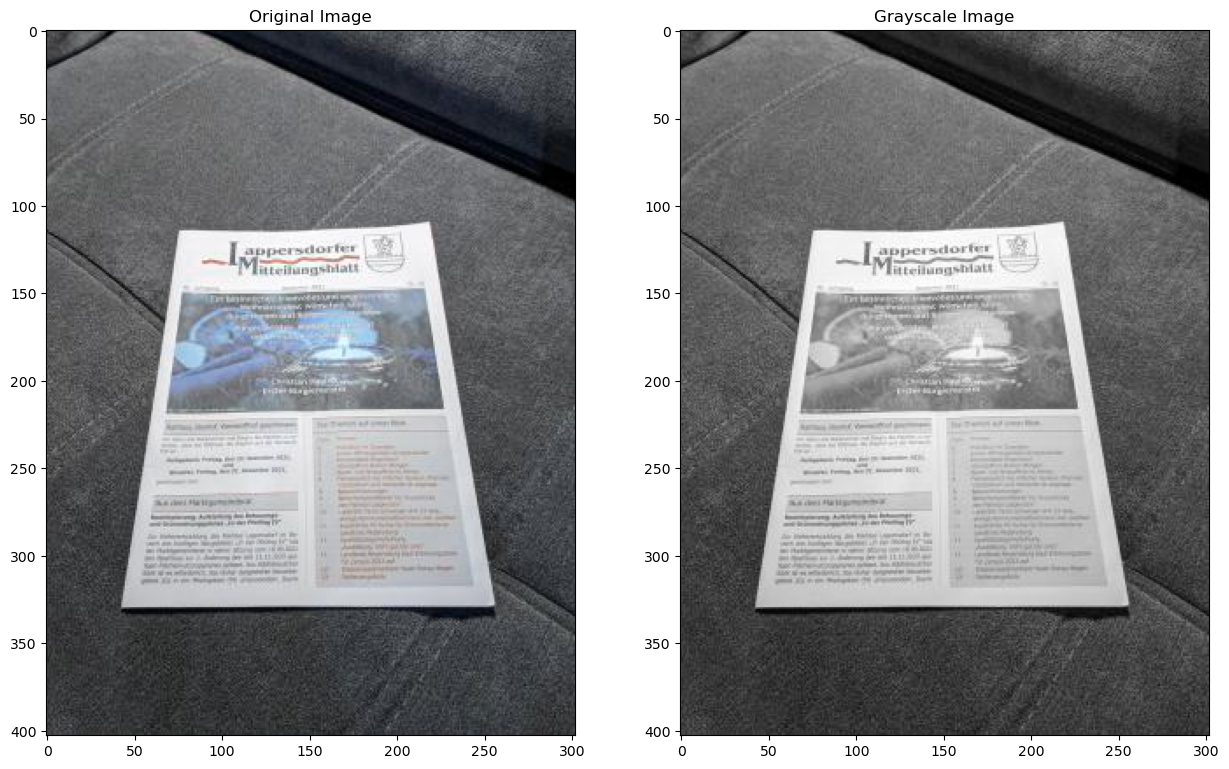

In [15]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Let's read the image
img = cv2.imread('/home/hask/Project/cv_homework/lesson6/data/document.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) / 255
rows, cols = gray.shape

# Plot the images
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
plt.show()

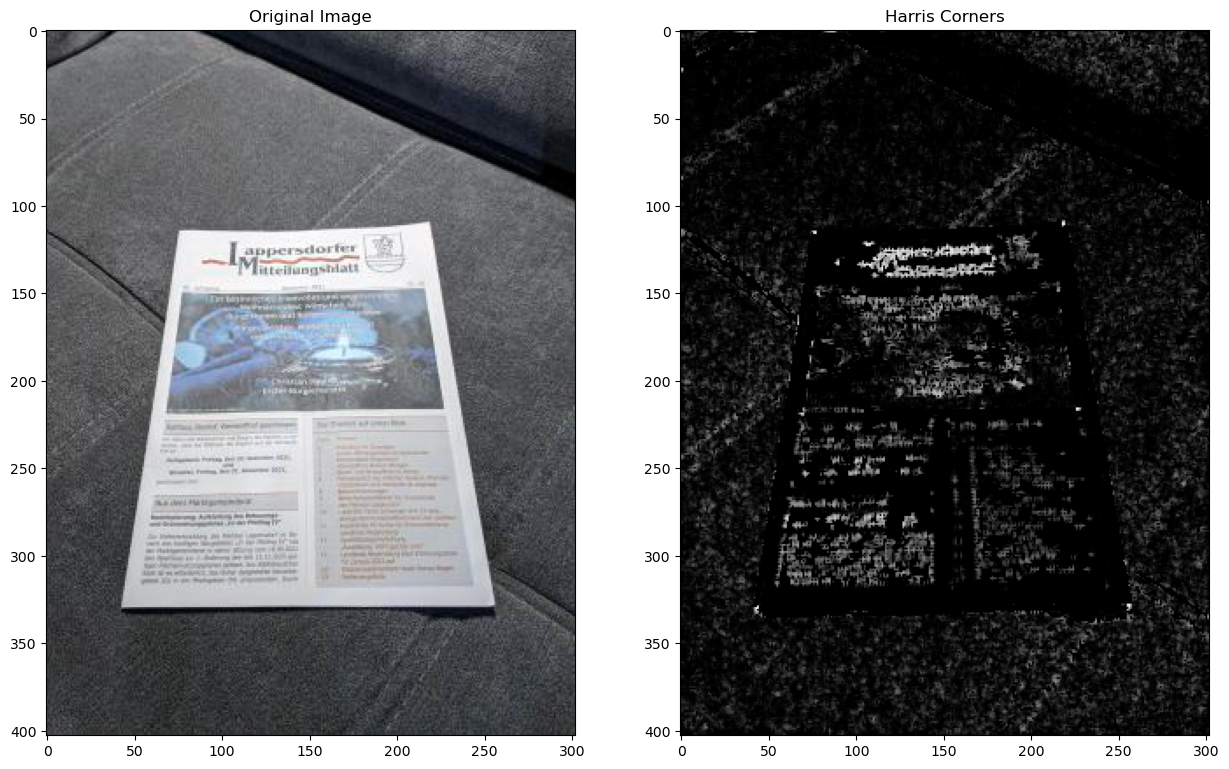

In [16]:
# Harris corner detection
cornerness = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Zero out negative cornerness values
cornerness[cornerness < 0] = 0

# Logarithmic scale for better visualization
cornerness = np.log(cornerness + 1e-6)

# Plot the results
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(cornerness, cmap='gray'), plt.title('Harris Corners')
plt.show()

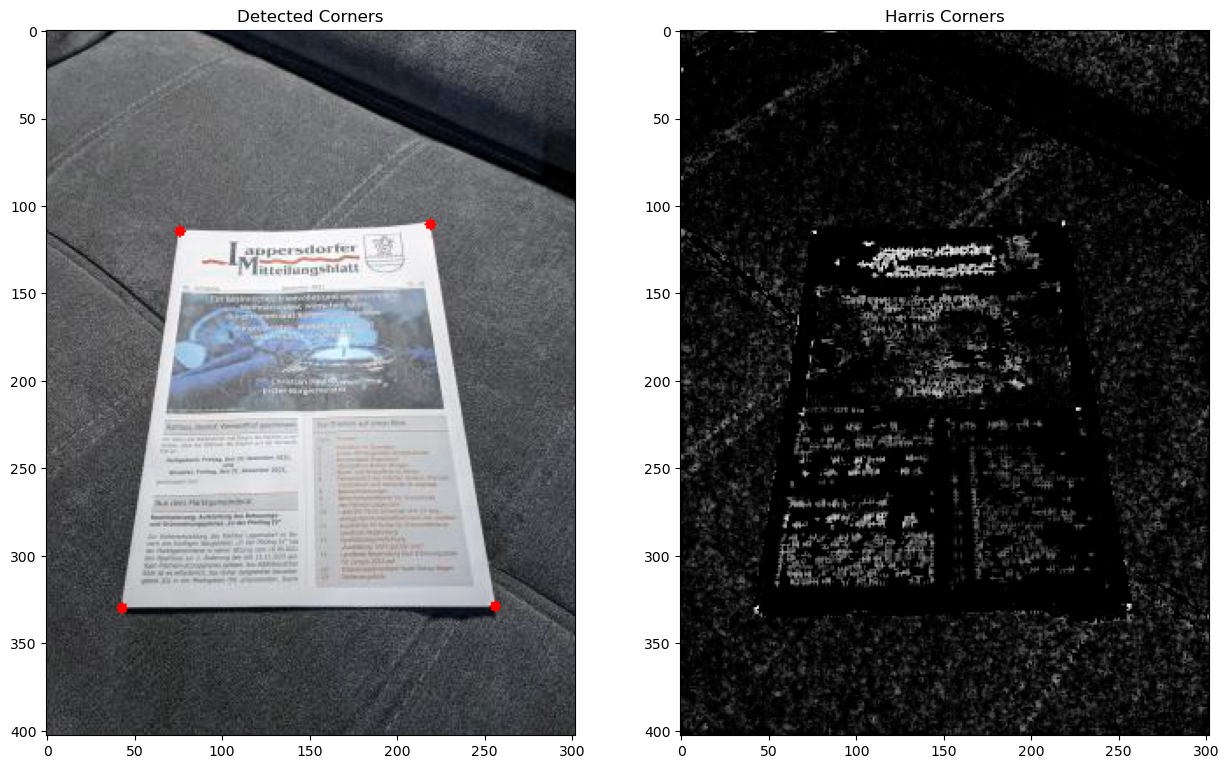

In [17]:
# Thresholds and coordinates
th_top_left = th_top_right = th_bottom_left = th_bottom_right = -1e6
opt_top_left = opt_top_right = opt_bottom_left = opt_bottom_right = None
quad_size = 7

# Scan the Harris detection results
for r in range(quad_size, rows-quad_size):
    for c in range(quad_size, cols-quad_size):
        if cornerness[r, c] < -7:
            continue
        
        block = 255 * gray[r-quad_size:r+quad_size+1, c-quad_size:c+quad_size+1]
        quad_top_left = block[0:quad_size, 0:quad_size]
        quad_top_right = block[0:quad_size, quad_size+1:]
        quad_bottom_left = block[quad_size+1:, 0:quad_size]
        quad_bottom_right = block[quad_size+1:, quad_size+1:]
        
        # Descriptor for the top-left document corner
        descriptor = np.mean(quad_bottom_right) - np.mean(quad_top_left) - np.mean(quad_top_right) - np.mean(quad_bottom_left)
        
        if descriptor > th_top_left:
            th_top_left = descriptor
            opt_top_left = (c, r)
        
        # Implement the descriptors for the other three corners
        # Top-right corner
        descriptor = np.mean(quad_bottom_left) - np.mean(quad_top_right) - np.mean(quad_top_left) - np.mean(quad_bottom_right)
        if descriptor > th_top_right:
            th_top_right = descriptor
            opt_top_right = (c, r)
        
        # Bottom-left corner
        descriptor = np.mean(quad_top_right) - np.mean(quad_bottom_left) - np.mean(quad_top_left) - np.mean(quad_bottom_right)
        if descriptor > th_bottom_left:
            th_bottom_left = descriptor
            opt_bottom_left = (c, r)
        
        # Bottom-right corner
        descriptor = np.mean(quad_top_left) - np.mean(quad_bottom_right) - np.mean(quad_top_right) - np.mean(quad_bottom_left)
        if descriptor > th_bottom_right:
            th_bottom_right = descriptor
            opt_bottom_right = (c, r)

# Draw circles at the detected corners
out = cv2.circle(img, opt_top_left, 3, (255, 0, 0), -1)
out = cv2.circle(img, opt_top_right, 3, (255, 0, 0), -1)
out = cv2.circle(img, opt_bottom_left, 3, (255, 0, 0), -1)
out = cv2.circle(img, opt_bottom_right, 3, (255, 0, 0), -1)

# Plot the images with the detected corners
plt.subplot(121), plt.imshow(out), plt.title('Detected Corners')
plt.subplot(122), plt.imshow(cornerness, cmap='gray'), plt.title('Harris Corners')
plt.show()

In [18]:

1. Does it matter whether the picture has been taken by a 1Mpx camera or a 12Mpx camera? How?
Разрешение камеры имеет значение. Это напрямую влияет на уровень детализации изображения, который влияет на то, насколько хорошо можно обнаруживать такие объекты, как углы.
Более высокое разрешение обеспечивает большую детализацию, что может помочь в точном обнаружении углов. Тем не менее, это также означает больше данных для обработки, что может замедлить работу алгоритма.
    
2. If we increased the resolution of the camera, what would you change in the current algorithm?
Возможно потребуется уменьшить размер блока в детекторе углов Харриса, чтобы сосредоточиться на более мелких деталях.
Параметр quad_size, может потребовать корректировки для обработки возросшей детализации.

Object `How` not found.
Object `algorithm` not found.
